In [1]:
# 라이브러리 import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from statsmodels.compat import lzip

In [2]:
# csv 데이터 파일 불러오기
boston = datasets.load_boston()
X = boston.data
y = boston.target

print(type(X)) 
print(X.shape)
print(type(y))
print(y.shape)
# esc: command mode
# h: keyboard shortcuts 

<class 'numpy.ndarray'>
(506, 13)
<class 'numpy.ndarray'>
(506,)


In [3]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
# 선형 회귀 모형 추정
X_aug = sm.add_constant(X, prepend=False)  # 상수항 추가
print(type(X_aug))
print(X_aug.shape)

<class 'numpy.ndarray'>
(506, 14)


In [7]:
pd.DataFrame(X_aug)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,1.0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,1.0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,1.0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,1.0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,1.0


In [8]:
reg_no_intercept = sm.OLS(y, X).fit()
reg_intercept = sm.OLS(y,X_aug).fit()

In [9]:
print(reg_no_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:22:57   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0929      0.034     -2.699      0.0

In [10]:
print(reg_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        15:24:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1080      0.033     -3.287      0.0

In [10]:
%whos 

Variable             Type                        Data/Info
----------------------------------------------------------
X                    ndarray                     506x13: 6578 elems, type `float64`, 52624 bytes
X_aug                ndarray                     506x14: 7084 elems, type `float64`, 56672 bytes
boston               Bunch                       {'data': array([[6.3200e-<...>boston_house_prices.csv'}
datasets             module                      <module 'sklearn.datasets<...>\\datasets\\__init__.py'>
lzip                 function                    <function lzip at 0x000001DE493952F0>
mean_squared_error   function                    <function mean_squared_er<...>or at 0x000001DE4BAEDD90>
name                 list                        n=4
np                   module                      <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pd                   module                      <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
plt                  mo

In [11]:
# Step3. predict
y_pred_no_intercept = reg_no_intercept.predict(X)
y_pred_intercept = reg_intercept.predict(X_aug)
print("Model1 RMSE ",mean_squared_error(y, y_pred_no_intercept))
print("Model2 RMSE ", mean_squared_error(y, y_pred_intercept))

Model1 RMSE  24.166099330126492
Model2 RMSE  21.894831181729206


In [12]:
?mean_squared_error

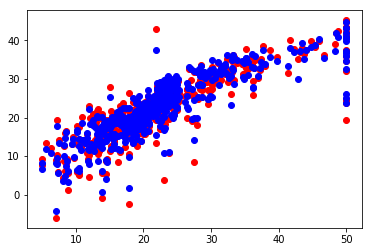

In [14]:
plt.plot(y, y_pred_no_intercept, 'r.', markersize=12)
plt.plot(y, y_pred_intercept, 'b.', markersize=12)

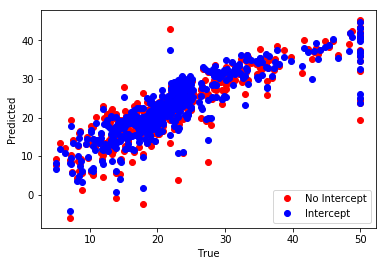

In [12]:
# Step4. Analysis and Diagnoses
import matplotlib.pyplot as plt
plt.plot(y, y_pred_no_intercept, 'r.', markersize=12)
plt.plot(y, y_pred_intercept, 'b.', markersize=12)
plt.legend(('No Intercept', 'Intercept'), loc='lower right')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

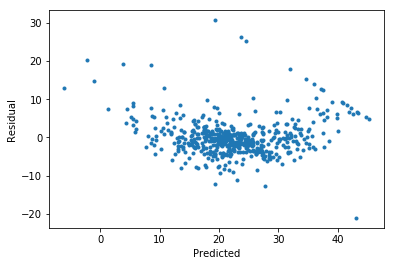

In [14]:
plt.plot(y_pred_no_intercept, reg_no_intercept.resid,'.')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

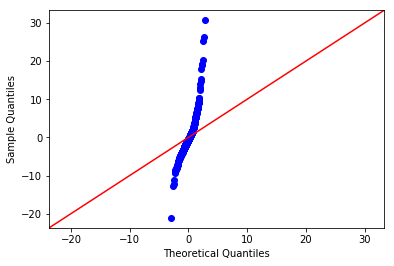

In [15]:
probplot = sm.ProbPlot(reg_no_intercept.resid)
probplot.qqplot(line='45')
plt.show()

In [16]:
# Normality test: Jarque-Bera test based on the skewness and kurtosis
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(reg_no_intercept.resid)
lzip(name, test)

[('Jarque-Bera', 1374.2254919299512),
 ('Chi^2 two-tail prob.', 3.8969603049218643e-299),
 ('Skew', 1.6091774897580615),
 ('Kurtosis', 10.404245199177083)]